# USECASE: Modeling Automated Grade assesment System using gauss bayes and KNN

### Introduction: 

As the educators and professionals are dedicated to the advancement of education, we understand the challenges faced by institutions when it comes to grading and assessing the huge amount of answer sheets.
- Automated Grade Assessment System, a powerful ML model​

- Designed to read hand-written digits, Characters , letters and  symbols with high accuracy.​

- Developed using the K-Nearest Neighbors (KNN) algorithm​

- Trained with a widely acclaimed dataset​

- An innovative solution for grading multiple-choice answer sheets and assessing numerical calculations in exams by college board​

- With  high accuracy, time-saving capabilities, and reliable performance​   

### Problem statement​

- Traditional exam evaluation methods : manual grading ​

- Prone to human error, leading to inconsistencies in results and potential unfairness​

- The sheer volume of exams and assessments​

- Delay in providing feedback to students​

- Recognizing these challenges, we sought to develop an automated solution​

### Solution Overview​

- leverages the power of machine learning specifically KNN algorithm​

- Designed to recognize handwritten digits.​

- Trained on widely recognized MNIST dataset​

- Have achieved an accuracy rate of 96%.​

- Confusion matrix demonstrated the model's ability​

- The system can accurately classify the handwritten responses​

- Designed to integrate seamlessly with existing educational platforms​

In [1]:
### Tools

In [1]:
import pandas as pd

In [43]:
import seaborn as sns

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from scipy.stats import multivariate_normal as mvn

### MNIST DATASET -EDA​

In [4]:
rawdata = pd.read_csv("MNIST_train.csv")

In [5]:
test_data = pd.read_csv("MNIST_test.csv")

In [6]:
test_data.head()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test_data = test_data.drop(['Unnamed: 0','index'], axis = 1)

In [22]:
test_data.head()

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test_data.isna().sum().sum()

0

In [9]:
df=rawdata.copy()

In [25]:
df.head()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.shape

(60000, 787)

In [27]:
df.describe()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
count,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,29999.500000,29999.500000,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,17320.652413,17320.652413,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,14999.750000,14999.750000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,29999.500000,29999.500000,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,44999.250000,44999.250000,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,59999.000000,59999.000000,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [28]:
df.nunique()

Unnamed: 0    60000
index         60000
labels           10
0                 1
1                 1
              ...  
779               3
780               1
781               1
782               1
783               1
Length: 787, dtype: int64

In [11]:
df = df.drop(['Unnamed: 0','index'], axis = 1)

In [30]:
df.head()

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df.tail()

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
data = df.to_numpy()

In [13]:
data.shape

(60000, 785)

In [34]:
data

array([[5, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [35]:
# Checking no.of total NaN values
df.isna().sum().sum()

0

In [14]:
X = data[:,1:]

In [37]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
X.shape

(60000, 784)

In [16]:
y = data[:,0]

In [17]:
y.shape

(60000,)

### Overview: MNIST dataset

- This dataset has 60,000 training data set and 10,000 test images​

- Contain hand written digits from 0 to 9.​

- So there are total 10 classes.​

- A single digit image - 28 X 28 pixels​

- The processed dataset has 785 columns​

- 784 independent variables and 1 target variable.  ​

- There is no NaN values.​

- Column: Max value: 255 and Min value: 0 ​


## Model-1: Naive Bayes(GaussNaiveBayes)

In [41]:
class GaussNB():

  def fit(self, X,y, epsilon = 1e-3):
    self.likelihood = dict()
    self.priors = dict()

    self.K = set(y.astype(int))
    for k in self.K:
      X_k = X[y==k]
      self.likelihood[k] = {'mean': X_k.mean(axis=0),'cov': X_k.var(axis = 0)+ epsilon}
      self.priors[k] = len(X_k)/len(X)

  def predict(self,X):
    N, D = X.shape
    P_hat = np.zeros((N,len(self.K)))

    for k, l in self.likelihood.items():
      P_hat[:,k] = mvn.logpdf(X,l['mean'],l['cov'])+ np.log(self.priors[k])

    return P_hat.argmax(axis=1)

In [24]:
def accuracy(y,y_hat):
  return np.mean(y == y_hat)

In [43]:
gnb_m1 = GaussNB()

In [44]:
gnb_m1.fit(X,y)

In [18]:
test = test_data.to_numpy()

In [19]:
test.shape

(10000, 785)

In [20]:
test_X = test[:,1:]

In [21]:
test_X.shape

(10000, 784)

In [22]:
test_y = test[:,0]

In [23]:
test_y.shape

(10000,)

In [51]:
y_hat = gnb_m1.predict(test_X)

In [52]:
y_hat

array([9, 2, 1, ..., 9, 8, 6], dtype=int64)

In [53]:
accuracy(test_y, y_hat)

0.5878

## Model-2 : Gaussian bayes

In [54]:
class  GaussBayes():

  def fit(self, X,y,epsilon =1e-3):
    self.likelihoods=dict()
    self.priors=dict()

    self.K = set(y.astype(int))

    for k in self.K:
      X_k = X[y==k,:]
      N_k, D =X_k.shape
      mu_k = X_k.mean(axis=0)

      self.likelihoods[k] = {"mean": X_k.mean(axis=0), "cov":(1/(N_k-1))*np.matmul((X_k-mu_k).T,X_k-mu_k )+epsilon*np.identity(D)}
      self.priors[k] =len(X_k)/len(X)

  def predict(self, X):
    N,D =X.shape

    P_hat = np.zeros((N, len(self.K))) 
    for k, l in self.likelihoods.items():
      P_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"])+ np.log(self.priors[k])

    return P_hat.argmax(axis=1)

In [55]:
gaussbayes = GaussBayes()

In [56]:
gaussbayes.fit(X,y, epsilon=1e-3)

In [57]:
y_hat = gaussbayes.predict(test_X)

In [58]:
accuracy(test_y, y_hat)

0.7532

In [68]:
acc = {}
for i in np.arange(30,40,0.5):
    gaussbayes.fit(X,y,i)
    y_hat = gaussbayes.predict(test_X)
    acc[i] = accuracy(test_y, y_hat)


In [69]:
result

{30.0: 0.8968,
 30.5: 0.897,
 31.0: 0.8974,
 31.5: 0.8978,
 32.0: 0.8982,
 32.5: 0.8985,
 33.0: 0.8989,
 33.5: 0.8994,
 34.0: 0.8997,
 34.5: 0.8997,
 35.0: 0.8999,
 35.5: 0.9003,
 36.0: 0.9002,
 36.5: 0.9005,
 37.0: 0.9007,
 37.5: 0.9009,
 38.0: 0.9013,
 38.5: 0.9015,
 39.0: 0.9016,
 39.5: 0.9019}

In [70]:
acc = {}
for i in np.arange(40,70,0.5):
    gaussbayes.fit(X,y,i)
    y_hat = gaussbayes.predict(test_X)
    acc[i] = accuracy(test_y, y_hat)

In [71]:
result

{40.0: 0.9021,
 40.5: 0.9022,
 41.0: 0.9023,
 41.5: 0.9026,
 42.0: 0.903,
 42.5: 0.9032,
 43.0: 0.9032,
 43.5: 0.9035,
 44.0: 0.9037,
 44.5: 0.9038,
 45.0: 0.9038,
 45.5: 0.904,
 46.0: 0.9041,
 46.5: 0.9044,
 47.0: 0.9046,
 47.5: 0.9046,
 48.0: 0.9048,
 48.5: 0.9049,
 49.0: 0.9049,
 49.5: 0.9049,
 50.0: 0.905,
 50.5: 0.9051,
 51.0: 0.9054,
 51.5: 0.9055,
 52.0: 0.9058,
 52.5: 0.9059,
 53.0: 0.906,
 53.5: 0.906,
 54.0: 0.9062,
 54.5: 0.9063,
 55.0: 0.9066,
 55.5: 0.9068,
 56.0: 0.9071,
 56.5: 0.9076,
 57.0: 0.9079,
 57.5: 0.9081,
 58.0: 0.9085,
 58.5: 0.9086,
 59.0: 0.9087,
 59.5: 0.9089,
 60.0: 0.9092,
 60.5: 0.9095,
 61.0: 0.9096,
 61.5: 0.9097,
 62.0: 0.9099,
 62.5: 0.9103,
 63.0: 0.9104,
 63.5: 0.9105,
 64.0: 0.9106,
 64.5: 0.9106,
 65.0: 0.9108,
 65.5: 0.9108,
 66.0: 0.9108,
 66.5: 0.911,
 67.0: 0.911,
 67.5: 0.9115,
 68.0: 0.9115,
 68.5: 0.9115,
 69.0: 0.9117,
 69.5: 0.9119}

In [72]:
acc = {}
for i in np.arange(70,100,0.5):
    gaussbayes.fit(X,y,i)
    y_hat = gaussbayes.predict(test_X)
    acc[i] = accuracy(test_y, y_hat)

## Model-3: KNN 

In [25]:
class KNNClassifier():

  def fit(self, X, y):
    self.X=X
    self.y=y

  def predict(self,X, K, epsilon = 1e-3):

    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2, axis=1)
      idxt = np.argsort(dist2)[:K] # sort the dist (indexes) upto K no.of values
      gamma_k = 1/(np.sqrt(dist2[idxt] + epsilon))

      y_hat[i] = np.bincount(self.y[idxt], weights = gamma_k).argmax()

    return y_hat

In [26]:
# Function for min-max scalling

def min_max_scaling(data, epsilon = 1e-14):
    
    feature_mins = np.min(data, axis = 0)
    feature_maxs = np.max(data, axis = 0)
    
    scaled_data = (data - feature_mins) / (feature_maxs - feature_mins + epsilon)
    
    return scaled_data


In [126]:
max

<function max>

In [27]:
np.max(X[3])

255

In [28]:
scaled_train_X = min_max_scaling(X)

In [29]:
np.max(scaled_train_X[3])

1.0

In [30]:
np.min(scaled_train_X[3])

0.0

In [31]:
scaled_test_X = min_max_scaling(test_X)

### Optimal Value for K​

- K value that minimizes the error​

- Error = 1- Accuracy​

- Used Elbow method to choose K value​

- Trained the model with multiple K-values​

- [1, 50, 100, 500, 1000]​

- Tested all the models with above K values​

- Calculated the accuracies of all the models​

- Calculated the errors for all the models​

In [32]:
# To choose optimal values for K
test_error_rates = []
accuracies = []
k_values = [1, 50, 100, 500, 1000]

for k in k_values:
    knn_model = KNNClassifier()
    knn_model.fit(scaled_train_X, y)
   
    y_hat = knn_model.predict(scaled_test_X, k)
    
    test_error = 1 - accuracy(test_y, y_hat)
    acc = accuracy(test_y, y_hat)
    
    test_error_rates.append(test_error)
    accuracies.append(acc)

In [33]:
accuracies

[0.9691, 0.9546, 0.9449, 0.9065, 0.8788]

In [34]:
test_error_rates

[0.03090000000000004,
 0.045399999999999996,
 0.05510000000000004,
 0.09350000000000003,
 0.12119999999999997]

Text(0.5, 0, 'No. of K')

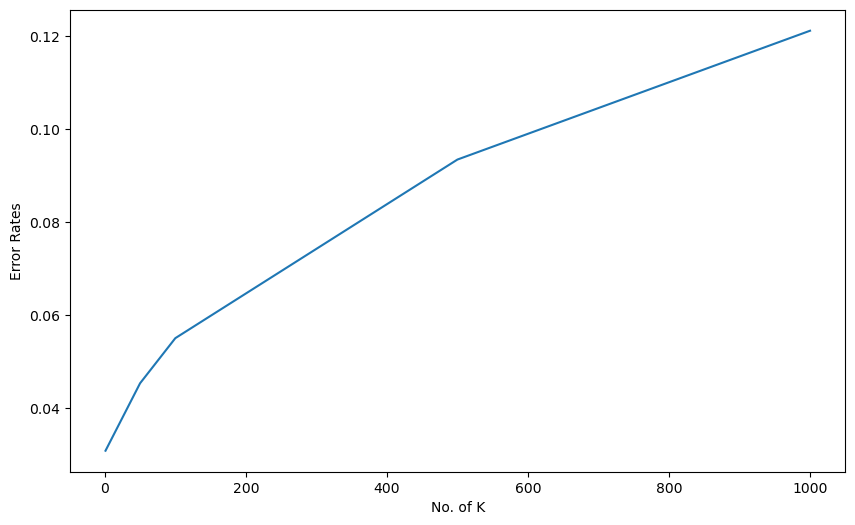

In [36]:
# r = [0.03090000000000004, 0.045399999999999996, 0.05510000000000004, 0.09350000000000003, 0.12119999999999997]
plt.figure(figsize = (10,6))
plt.plot([1,50,100,500,1000], test_error_rates)
plt.ylabel("Error Rates")
plt.xlabel("No. of K")

In [ ]:
# Another way to choose K-value

In [37]:
knn = KNNClassifier()
knn.fit(scaled_train_X,y)

In [135]:
# To choose optimal value for K
number_of_k = np.sqrt(10000)

In [87]:
number_of_k

100.0

#### Let's try with k=30

In [38]:
y_hat_30 = knn.predict(scaled_test_X, 30)

In [40]:
accuracy(test_y,y_hat_30)

0.9605

In [41]:
# Crosstab
crosstab = pd.crosstab(test_y, y_hat_30)
print(crosstab)

col_0  0.0   1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0
row_0                                                   
0      970     1    1    0    0    2    5    1    0    0
1        0  1130    2    1    0    0    2    0    0    0
2       15    19  957    7    2    0    4   21    7    0
3        0     3    2  977    1   11    0    7    4    5
4        0    15    0    0  931    0    7    2    2   25
5        4     2    0    9    1  858   11    2    0    5
6        8     5    0    0    3    2  940    0    0    0
7        0    32    3    0    2    0    0  974    0   17
8        8     5    4   14    6   12    3    6  907    9
9        8     7    3    8    9    2    1   10    0  961


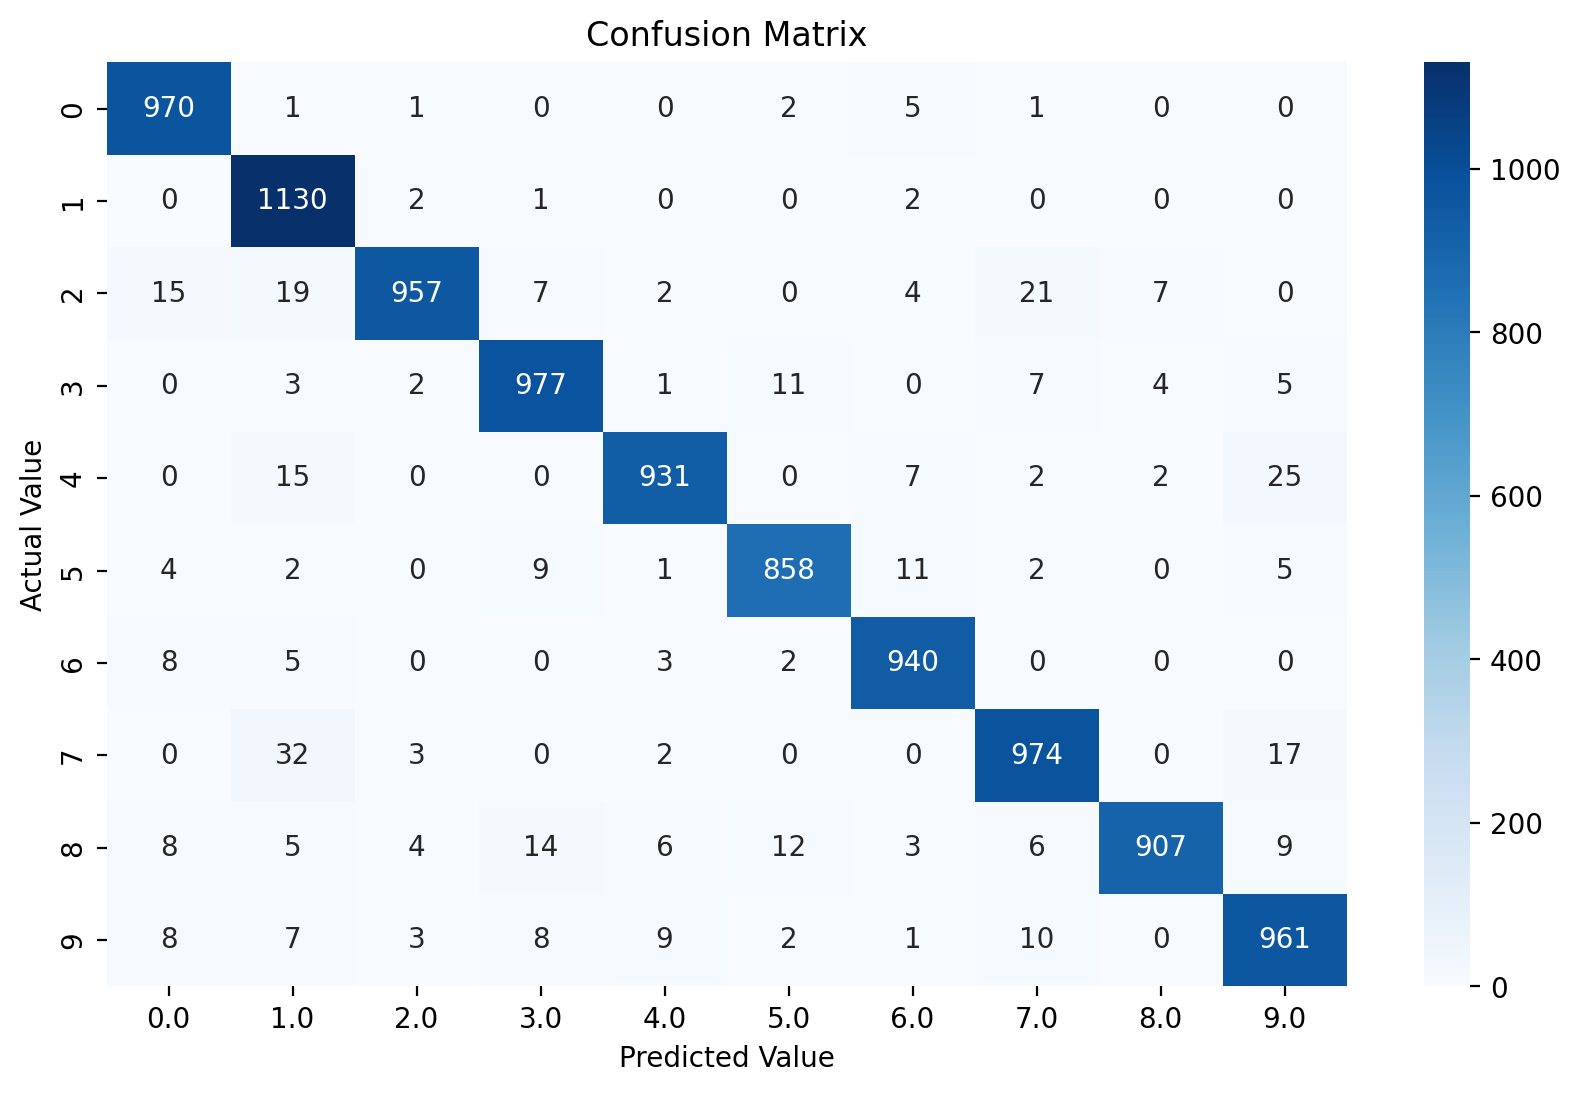

In [44]:
plt.figure(figsize=(10,6), dpi = 200)
sns.heatmap(crosstab, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("Confusion Matrix")
plt.show()

### Model

- Automated Grade Assessment System, powered by the KNN algorithm with an accuracy rate of 96% and K=30​

- Offers an innovative solution for automating the grading and evaluation of handwritten digit-based assessments with many key benefits.​

- This accuracy, combined with the generated confusion matrix, reinforces the reliability and effectiveness of the model​

- The model has been trained on MNIST 60,000 training data and test on 10000 test data. ​

- Implemented Min-Max scaler for scaling the features.​

- By embracing this automated approach, institutions can optimize their resources, improve the overall assessment process, and enhance the learning experience for students.​

### Key Benefits:

This model offers numerous advantages and benefits for educational institutions, teachers, and students : ​

- Higher Accuracy​

- Time Saving​

- Reduce workload for educators​

- Efficient Feedback​

- Cost-Effectiveness​

- Data-Driven Insights​

- Seamless integration​